In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from PIL import Image
import os
import torch

In [2]:
DATA_ROOT = "/datasets/ai/allenai/satlas_pretrain/sentinel2/"   # location of downloaded satlas_pretrain dataset (see https://github.com/allenai/satlas/blob/main/SatlasPretrain.md#satlaspretrain-dataset)

In [3]:
metadata_path = "data/dataloader_data.npy"
with open(metadata_path, "rb") as f:
    data = np.load(f, allow_pickle=True)[()]["dataloader_data"]

In [4]:
text_embeddings = torch.load("data/wiki_data_v4.pt")["data"]    # From LE-SINR

/tmp/ipykernel_1446121/4082441624.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  text_embeddings = torch.load("data/wiki_data_v4.pt")["data"]    # From LE-SINR


In [5]:
data_idx = np.random.randint(0, high=len(data))
taxon_h3cell = data[data_idx]   # samples the taxon-h3 cell to use (NOTE: each of this is a list of lists of satellite images and texts that the taxon/species was found)
rand_idx = np.random.randint(low=0, high=len(taxon_h3cell)) # randomly choose satellite image - text pair

tmp_fp, lon, lat, text_emb_idx, aug_fns = taxon_h3cell[rand_idx]

In [6]:
lon, lat    # this is the location, can be fed to SINR

(5.82275390625, 52.01193449293923)

In [7]:
fp = os.path.join(DATA_ROOT, tmp_fp)    # filepath of the RGB satellite image
image = Image.open(fp)  # size: (512,512)


aug_fn = np.random.choice(aug_fns)  # randomly sampled filepath of the time augmented image (same location, different time)
aug_fp = os.path.join(DATA_ROOT, aug_fn)
augmented_image = Image.open(aug_fp)  # size: (512,512)


text_embedding = text_embeddings[text_emb_idx]  # corresponding text embedding of the species

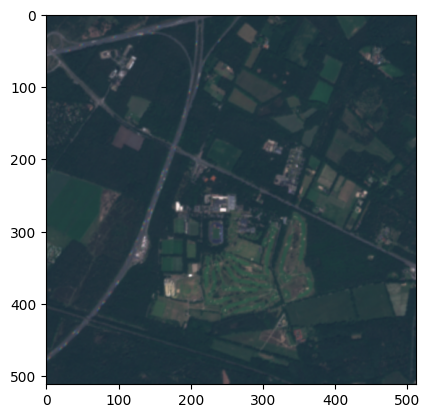

In [8]:
plt.imshow(image)

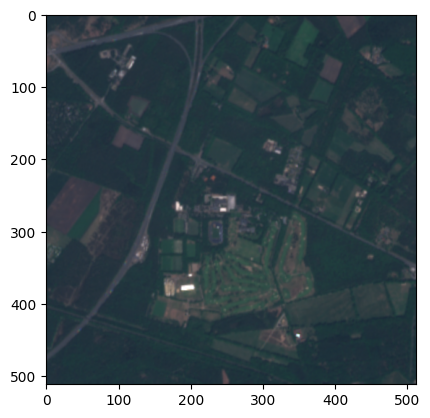

In [9]:
plt.imshow(augmented_image) # same location, different time

# To get corresponding taxon_id

In [10]:
txt_tmp = torch.load("data/wiki_data_v4.pt")

/tmp/ipykernel_1446121/2731514871.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  txt_tmp = torch.load("data/wiki_data_v4.pt")


In [11]:
section_name = txt_tmp["keys"][text_emb_idx][1] # section name of text used

key = txt_tmp["keys"][text_emb_idx][0]
taxon_id = txt_tmp["taxon_id"][key]

section_name, taxon_id  # taxon_id can be used with data from iNaturalist

('text', tensor(52992))